In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train[50000], x_train[50000]

In [ ]:
x_train[50000]/255

3 <class 'numpy.uint8'>


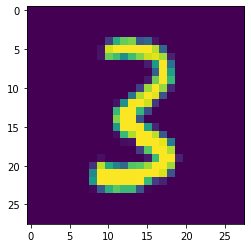

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [8]:
x_train = x_train.reshape(-1, 28*28)/255
x_train.shape

(60000, 784)

In [10]:
x_test = x_test.reshape(-1, 28*28)/255
x_test.shape

(10000, 784)

In [11]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [12]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 --> softmax, binary --> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer 

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

# evaluation

In [18]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

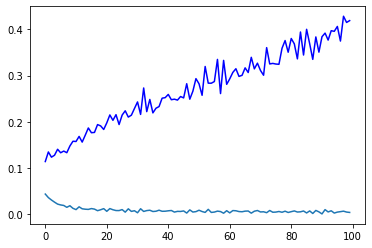

In [19]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

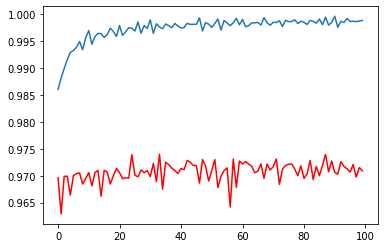

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

In [ ]:
x_test[30]

In [ ]:
import numpy as np
np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])
pred, np.argmax(pred)

In [23]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [24]:
model.save('./model_save01.h5')

In [25]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [26]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 2.8063559e-23, 0.0000000e+00, 1.7092943e-35,
         0.0000000e+00, 1.2035017e-35]], dtype=float32), 3)